In [3]:
import pandas as pd
import matplotlib.pyplot as plt
sp_read = pd.read_csv('../data/SP.csv')
sp = sp_read.loc[pd.to_datetime(sp_read['date'].astype(str)) >= pd.Timestamp('2000-01-01')].copy()

In [4]:
# Cell 2 – compute daily trade counts and volume
sp['date_time'] = pd.to_datetime(sp['date'].astype(str) + ' ' + sp['time'].astype(str))
sp['date'] = sp['date_time'].dt.normalize()

daily_stats = (
    sp.groupby('date')
      .agg(trade_count=('date_time', 'count'), total_volume=('volume', 'sum'))
      .sort_index()
)
daily_stats.head()

,trade_count,total_volume
date,,
2000-01-03,4334,0
2000-01-04,4202,0
2000-01-05,4115,0
2000-01-06,4145,0
2000-01-07,3843,0


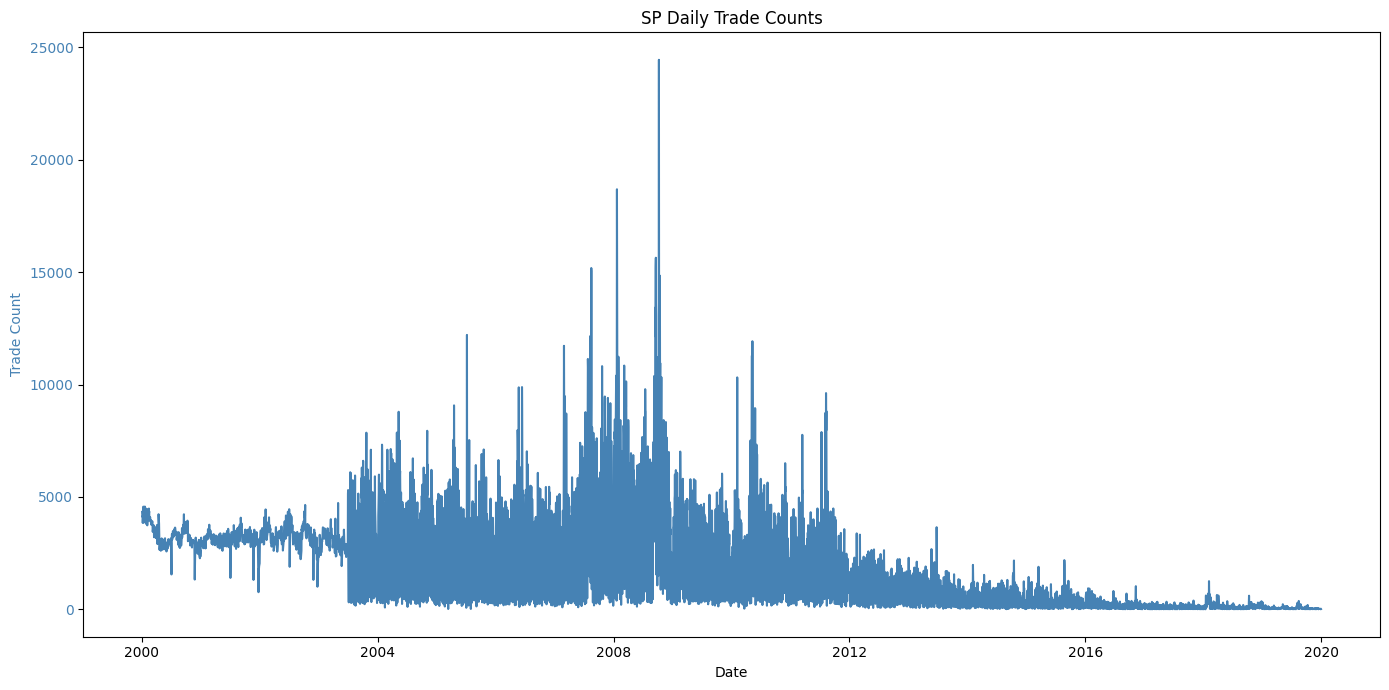

In [5]:
# Cell 3 – chart both series
fig, ax = plt.subplots(figsize=(14, 7))

ax.plot(daily_stats.index, daily_stats['trade_count'], color='steelblue', label='Daily Trade Count')
ax.set_ylabel('Trade Count', color='steelblue')
ax.tick_params(axis='y', labelcolor='steelblue')



ax.set_title('SP Daily Trade Counts')
ax.set_xlabel('Date')

lines, labels = ax.get_legend_handles_labels()

fig.tight_layout()
plt.show()

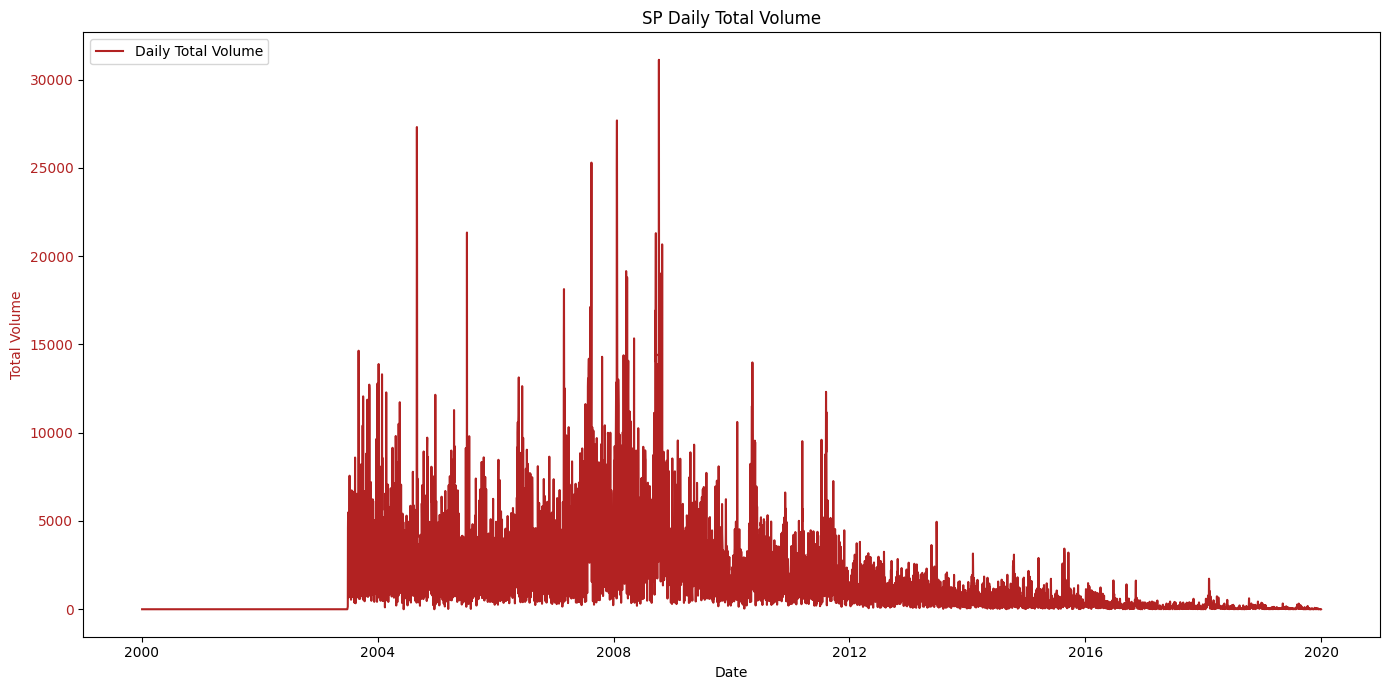

In [6]:
# Cell 3 – chart both series
fig, ax = plt.subplots(figsize=(14, 7))


ax.plot(daily_stats.index, daily_stats['total_volume'], color='firebrick', label='Daily Total Volume')
ax.set_ylabel('Total Volume', color='firebrick')
ax.tick_params(axis='y', labelcolor='firebrick')

ax.set_title('SP Daily Total Volume')
ax.set_xlabel('Date')

lines, labels = ax.get_legend_handles_labels()

ax.legend(lines, labels, loc='upper left')

fig.tight_layout()
plt.show()

In [7]:
# Convert time column to string format first, then combine
sp['date_time'] = pd.to_datetime(sp['date'].astype(str) + ' ' + sp['time'].astype(str))
sp_processed = sp[['date_time', 'price', 'volume']].copy()
sp_processed.columns = ['date_time', 'price', 'volume']

In [8]:
from mlfinlab.data_structures import standard_data_structures
dollar_bars = standard_data_structures.get_dollar_bars(
    sp_processed, threshold=1000000, batch_size=100000, verbose=False
)

import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x=dollar_bars[:].index,
                open=dollar_bars['open'],
                high=dollar_bars['high'],
                low=dollar_bars['low'],
                close=dollar_bars['close'])])
fig.update_layout(title='Dollar Bars - Candlestick Chart', xaxis_title='Date', yaxis_title='Price')
fig.show()


<frozen mlfinlab.util.fast_ewma>:17: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
